# **1. Perkenalan Dataset**


Dataset yang saay gunakan untuk submission ini adalah klasifikasi tingkat obesitas seseorang dengan 3 fitur, yaitu Gender (jenis kelamin), Height (tinggi badan), dan weight(berat badan).
Adapun untuk keterangan label Index nya yaitu:

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity


 **Sumber Dataset**:  
 https://www.kaggle.com/datasets/yasserh/bmidataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# **3. Memuat Dataset**

In [2]:
df=pd.read_csv("bmi.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [9]:
df["Index"].value_counts()

,count
Index,
5,198
4,130
2,69
3,68
1,22
0,13


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<ipython-input-10-471b08aa24b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


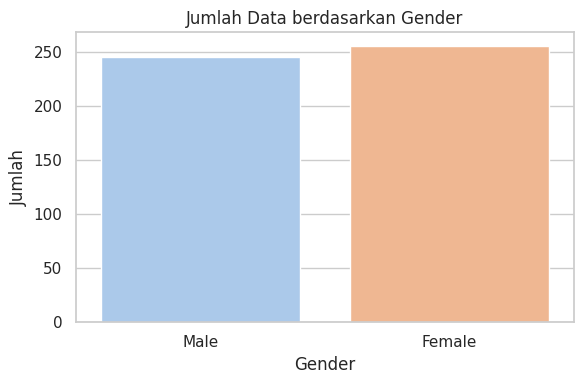

In [10]:
sns.set(style="whitegrid")

# Countplot untuk gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Jumlah Data berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


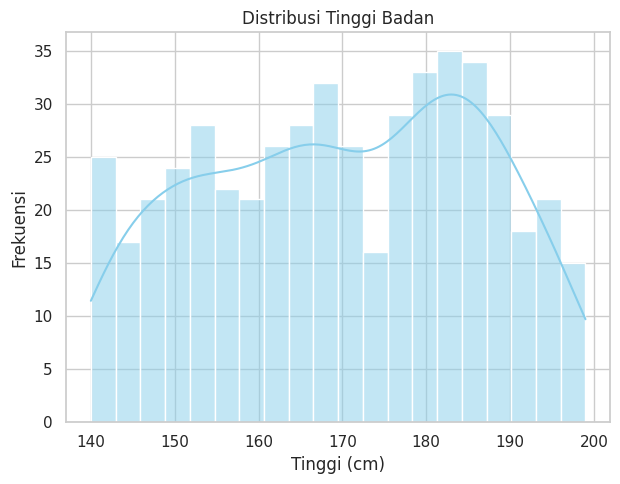

In [11]:
plt.figure(figsize=(12, 5))

# Histogram Tinggi
plt.subplot(1, 2, 1)
sns.histplot(df["Height"], kde=True, bins=20, color="skyblue")
plt.title("Distribusi Tinggi Badan")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

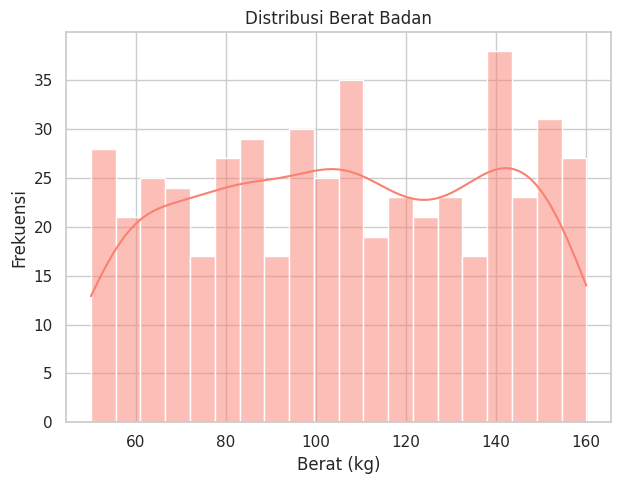

In [13]:
plt.figure(figsize=(12, 5))

# Histogram Berat
plt.subplot(1, 2, 2)
sns.histplot(df["Weight"], kde=True, bins=20, color="salmon")
plt.title("Distribusi Berat Badan")
plt.xlabel("Berat (kg)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [18]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [20]:
df.duplicated().sum()

np.int64(11)

In [21]:
data_clean = df.drop_duplicates()

In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  489 non-null    object
 1   Height  489 non-null    int64 
 2   Weight  489 non-null    int64 
 3   Index   489 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 19.1+ KB


Cek Outlier


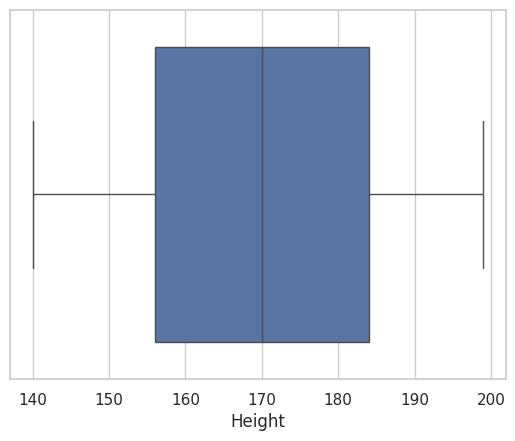

In [26]:
sns.boxplot(x=data_clean['Height'])
plt.show()

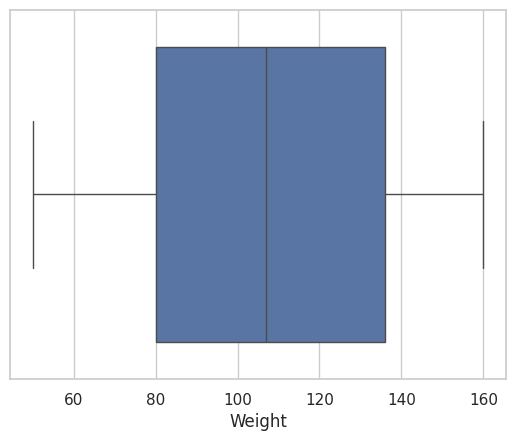

In [27]:
sns.boxplot(x=data_clean['Weight'])
plt.show()

Encode data kategorikal

In [42]:
le = LabelEncoder()

data_clean = data_clean.copy()
data_clean['Gender'] = le.fit_transform(data_clean['Gender'])


In [43]:
data_clean.head()

,Gender,Height,Weight,Index
0,1,0.249722,-0.320211,4
1,1,1.166954,-0.597951,2
2,0,0.922359,0.111828,4
3,0,1.533847,-0.073332,3
4,1,-1.278997,-1.400309,3


Scaling data numerik

In [44]:
scaler = StandardScaler()

data_clean[['Height', 'Weight']] = scaler.fit_transform(data_clean[['Height', 'Weight']])

In [45]:
data_clean.head()

,Gender,Height,Weight,Index
0,1,0.249722,-0.320211,4
1,1,1.166954,-0.597951,2
2,0,0.922359,0.111828,4
3,0,1.533847,-0.073332,3
4,1,-1.278997,-1.400309,3


Split data dengan porsi 80/20

In [47]:
data_train, data_test = train_test_split(data_clean, test_size=0.2, random_state=42)

print(f"Jumlah data train: {len(data_train)}")
print(f"Jumlah data test: {len(data_test)}")

Jumlah data train: 391
Jumlah data test: 98


In [48]:
data_train.head()

,Gender,Height,Weight,Index
328,0,-0.361766,-1.091709,3
140,0,-0.056022,-1.616328,2
442,1,-1.645890,1.315365,5
425,0,0.616615,-1.462028,1
498,1,-1.217849,-0.351071,5


In [49]:
data_train['Index'].value_counts()

,count
Index,
5,159
4,94
3,55
2,54
1,18
0,11


In [50]:
data_test.head()

,Gender,Height,Weight,Index
460,1,0.555466,0.513007,4
84,1,-0.117171,0.513007,5
443,1,-1.095551,1.222785,5
483,1,-1.462444,-0.659670,4
437,1,0.861210,1.562244,5


In [51]:
data_test['Index'].value_counts()

,count
Index,
5,36
4,34
2,15
3,9
1,2
0,2


Undersampling data_tarin dengan mengurangi data pada Index 5 sebanyak 60 data

In [53]:
subset_index_5 = data_train[data_train['Index'] == 5]

# Ambil 60 baris pertama dari subset itu untuk dihapus
rows_to_drop = subset_index_5.index[:60]

# Hapus baris dari data_train
data_train_dropped = data_train.drop(rows_to_drop, inplace=True)


In [56]:
data_train['Index'].value_counts()

,count
Index,
5,99
4,94
3,55
2,54
1,18
0,11


In [57]:
print(f"Jumlah data train: {len(data_train)}")
print(f"Jumlah data test: {len(data_test)}")

Jumlah data train: 331
Jumlah data test: 98


Simpan data

In [58]:
data_train.to_csv('data_train_obesity_preprocess.csv', index=False)


In [60]:
data_test.to_csv('data_test_obesity_preprocess.csv', index=False)